In [1]:
!pip install ultralytics supervision
!pip install git+https://github.com/NVlabs/describe-anything

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [2]:
!pip install --upgrade numpy



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 86.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dam 1.0.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.


In [1]:
import time
import psutil
from IPython.display import display, Javascript

# Initialize tracking variables
if 'start_time' not in globals():
    start_time = time.time()
    initial_ram = psutil.virtual_memory().used / (1024 ** 3)  # GB
    print("Tracking started for all cells...")

Tracking started for all cells...


In [2]:
import torch

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

from ultralytics import SAM
sam = SAM("sam2.1_b.pt").to(DEVICE)
print("SAM 2.1 model loaded on", DEVICE)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 154M/154M [00:01<00:00, 123MB/s]


SAM 2.1 model loaded on cuda


In [3]:
#Helper
import numpy as np
import matplotlib.pyplot as plt
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0) #alpha=0.6 makes the mask semi-transparent.
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))

In [4]:
print("SAM 2.1 model loaded on", DEVICE)

SAM 2.1 model loaded on cuda


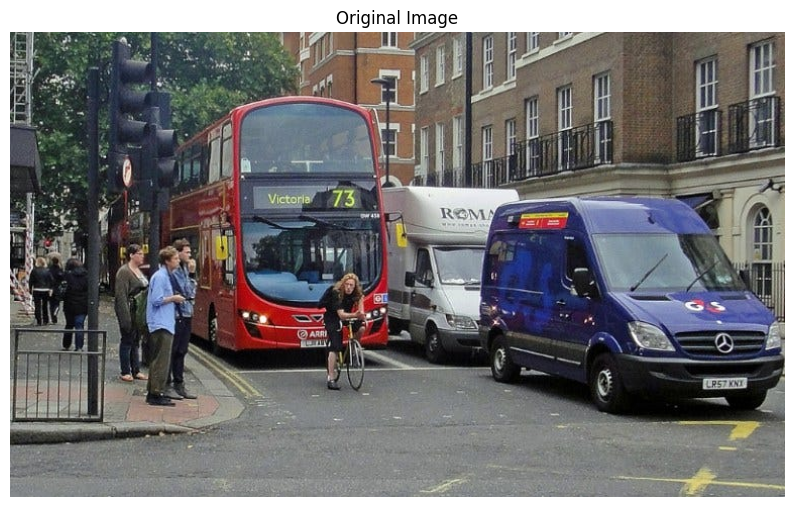

In [6]:
# Cell 5: Load your image
import cv2
image_path = "/content/1_v0Bm-HQxWtpbQ0Yq463uqw.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.title("Original Image")
plt.show()

In [7]:
# SAM 2.1: Direct mask generation with correct output handling
results = sam(image)  # image is an RGB numpy array
result = results[0]   # get first result (single image)

masks_tensor = result.masks.data  # torch tensor (num_masks, H, W)
masks = masks_tensor.cpu().numpy().astype(bool)  # convert to numpy boolean masks

filtered_masks = [m for m in masks]  # Add filtering if needed

print(f"Total masks generated: {len(masks)}")
print(f"Number of high-confidence masks: {len(filtered_masks)}")



0: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 14741.2ms
Speed: 123.1ms preprocess, 14741.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)
Total masks generated: 16
Number of high-confidence masks: 16


In [8]:
from ultralytics import YOLO
yolo = YOLO('yolov8m-world.pt').to(DEVICE)
# Set your desired zero-shot detection classes
yolo.set_classes(['person', 'car', 'bicycle', 'dog', 'cat', 'bus', 'truck',"objects"])
print("YOLO-World model loaded with custom zero-shot classes.")


100%|██████████| 55.9M/55.9M [00:01<00:00, 54.3MB/s]


requirements: Ultralytics requirement ['git+https://github.com/ultralytics/CLIP.git'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 2.9s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect



100%|████████████████████████████████████████| 338M/338M [00:01<00:00, 198MiB/s]


YOLO-World model loaded with custom zero-shot classes.


In [9]:
# Object detection function (using YOLO-World zero-shot classes)
def detect_objects(image, score_threshold=0.1):
    results = yolo.predict(image, conf=score_threshold, verbose=False)

    detections = []
    for result in results:
        for box in result.boxes:
            xyxy = box.xyxy.cpu().numpy()[0].tolist()
            conf = box.conf.cpu().numpy()[0]
            cls_id = int(box.cls.cpu().numpy()[0])
            # YOLO-World: class names are set via set_classes()
            label = yolo.model.names[cls_id] if hasattr(yolo.model, 'names') else str(cls_id)

            detections.append({
                'bbox': [int(coord) for coord in xyxy],  # [x1,y1,x2,y2]
                'label': label,
                'score': float(conf)
            })

    return sorted(detections, key=lambda x: x['score'], reverse=True)  # Highest score first


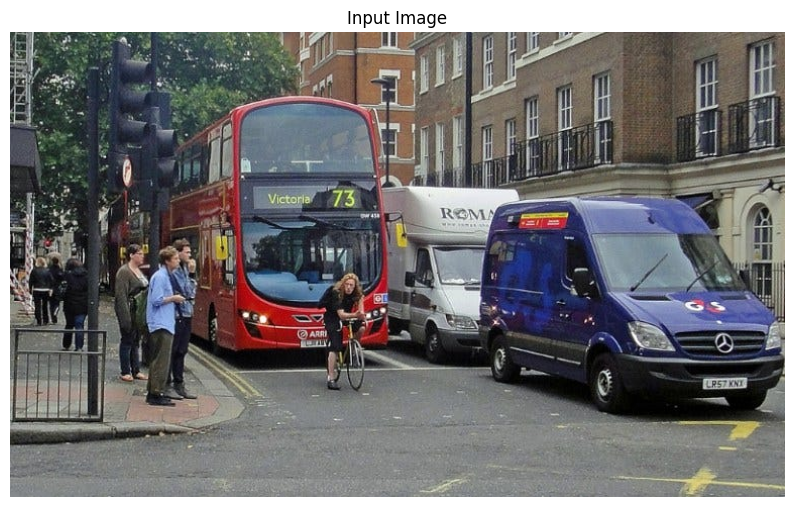

In [10]:
# Cell 13: Load and display input image
image_path = "/content/1_v0Bm-HQxWtpbQ0Yq463uqw.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.title("Input Image")
plt.show()


In [11]:
detections = detect_objects(image, score_threshold=0.15)

print(f"Detected {len(detections)} objects:")
for det in detections:
    print(f"- {det['label']} (confidence: {det['score']:.2f}): {det['bbox']}")


Detected 11 objects:
- bus (confidence: 0.90): [152, 63, 378, 321]
- person (confidence: 0.88): [304, 237, 352, 354]
- person (confidence: 0.81): [134, 212, 174, 371]
- person (confidence: 0.81): [102, 211, 137, 347]
- bicycle (confidence: 0.81): [313, 282, 353, 355]
- person (confidence: 0.71): [49, 225, 77, 317]
- bus (confidence: 0.67): [463, 162, 767, 379]
- person (confidence: 0.63): [18, 223, 43, 291]
- bus (confidence: 0.62): [365, 152, 506, 329]
- person (confidence: 0.61): [156, 219, 186, 354]
- person (confidence: 0.48): [36, 223, 54, 289]


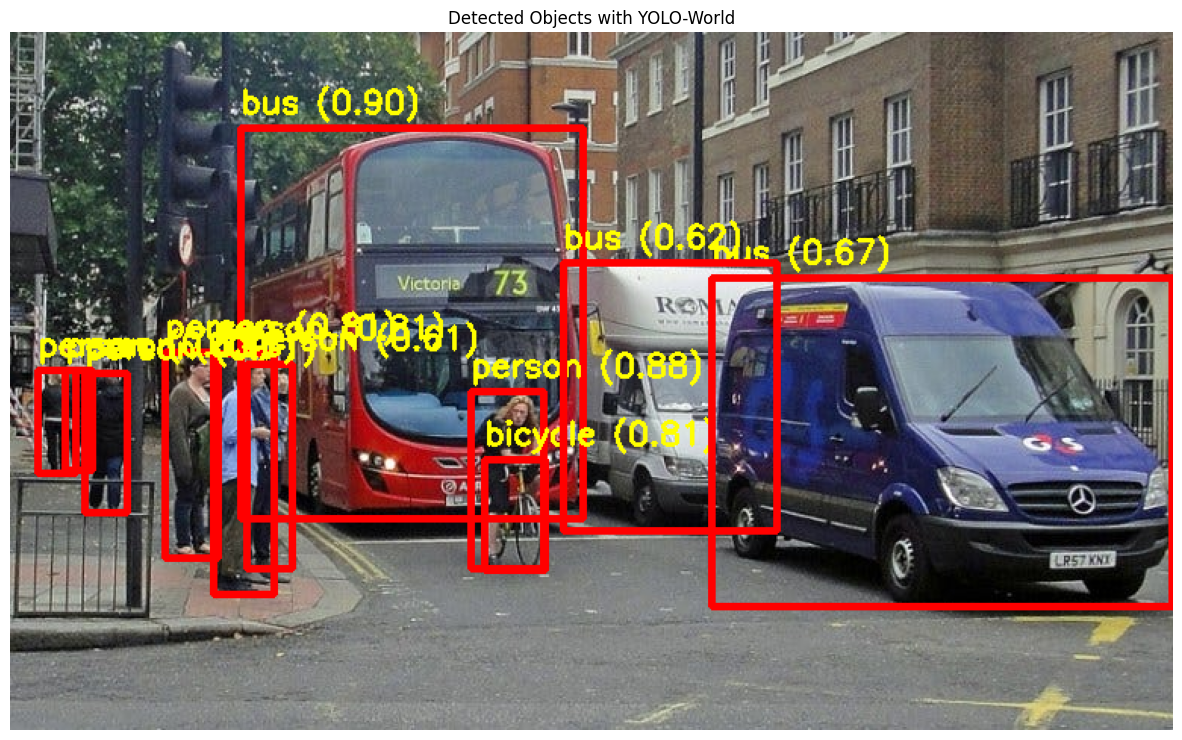

In [12]:
vis_image = image.copy()

for det in detections:
    x1, y1, x2, y2 = det['bbox']
    cv2.rectangle(vis_image, (x1, y1), (x2, y2), (255, 0, 0), 3)
    label = f"{det['label']} ({det['score']:.2f})"
    cv2.putText(vis_image, label, (x1, y1-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2)

plt.figure(figsize=(15, 10))
plt.imshow(vis_image)
plt.axis('off')
plt.title("Detected Objects with YOLO-World")
plt.show()


In [13]:
import json
import cv2

with open("detections.json", "w") as f:
    json.dump(detections, f, indent=2)

cv2.imwrite("detected_objects.jpg", cv2.cvtColor(vis_image, cv2.COLOR_RGB2BGR))
print("Results saved to detections.json and detected_objects.jpg")


Results saved to detections.json and detected_objects.jpg


In [14]:
def calculate_iou(mask, bbox):
    """Compute Intersection-over-Union between mask and bbox"""
    x1, y1, x2, y2 = map(int, bbox)
    bbox_mask = np.zeros(mask.shape[:2], dtype=np.uint8)
    cv2.rectangle(bbox_mask, (x1, y1), (x2, y2), 255, -1)
    mask_bool = mask > 0
    bbox_bool = bbox_mask > 0
    intersection = np.logical_and(mask_bool, bbox_bool).sum()
    union = np.logical_or(mask_bool, bbox_bool).sum()
    return intersection / max(union, 1e-6)

# For SAM 2.1, masks are already binary numpy arrays
binary_masks = [m.astype(np.uint8) for m in filtered_masks]

object_groups = []
for det in detections:
    group = {
        'label': det['label'],
        'bbox': [int(x) for x in det['bbox']],
        'masks': []
    }
    for mask in binary_masks:
        iou = calculate_iou(mask, group['bbox'])
        if iou > 0.5:
            group['masks'].append(mask)
    object_groups.append(group)


In [15]:
def mask_to_bbox(mask):
    """Convert binary mask to bounding box coordinates [x1,y1,x2,y2]"""
    contours, _ = cv2.findContours(mask.astype(np.uint8),
                 cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return None
    x, y, w, h = cv2.boundingRect(contours[0])
    return [x, y, x+w, y+h]

final_objects = []

for group in object_groups:
    if not group['masks']:
        continue

    merged = np.zeros_like(binary_masks[0], dtype=np.uint8)
    for mask in group['masks']:
        merged = cv2.bitwise_or(merged, mask.astype(np.uint8))
    bbox_coords = mask_to_bbox(merged > 0)
    if bbox_coords is None:
        continue

    x1, y1, x2, y2 = bbox_coords
    h, w = image.shape[:2]
    x1, y1 = max(0, x1), max(0, y1)
    x2, y2 = min(w, x2), min(h, y2)

    if x2 <= x1 or y2 <= y1:
        continue

    cropped = image[y1:y2, x1:x2]
    masked_crop = cv2.bitwise_and(cropped, cropped, mask=merged[y1:y2, x1:x2])

    final_objects.append({
        'label': group['label'],
        'bbox': [x1, y1, x2, y2],
        'merged_mask': merged[y1:y2, x1:x2],
        'cropped_image': masked_crop
    })

print(f"Successfully processed {len(final_objects)} objects")


Successfully processed 5 objects


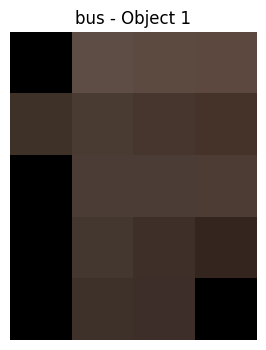

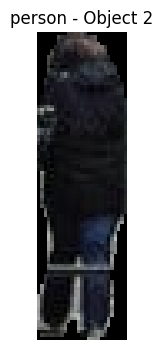

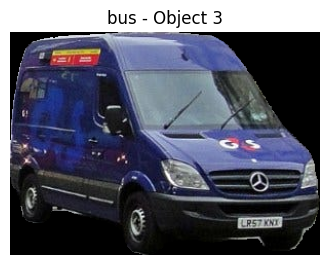

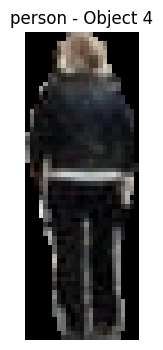

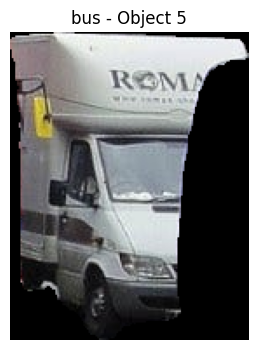

In [16]:
for i, obj in enumerate(final_objects):
    plt.figure(figsize=(4, 4))
    plt.title(f"{obj['label']} - Object {i+1}")
    plt.imshow(obj['cropped_image'])
    plt.axis('off')
    plt.show()


In [17]:
import os
save_dir = "cropped_objects"
os.makedirs(save_dir, exist_ok=True)

for i, obj in enumerate(final_objects):
    cropped_img = obj['cropped_image']
    cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
    filename = f"{obj['label']}_object_{i+1}.png"
    filepath = os.path.join(save_dir, filename)
    cv2.imwrite(filepath, cropped_img)
    print(f"Saved {filepath}")


Saved cropped_objects/bus_object_1.png
Saved cropped_objects/person_object_2.png
Saved cropped_objects/bus_object_3.png
Saved cropped_objects/person_object_4.png
Saved cropped_objects/bus_object_5.png


In [18]:
from dam.describe_anything_model import DescribeAnythingModel


In [19]:
from PIL import Image
import torch
model = DescribeAnythingModel(
    model_path="nvidia/DAM-3B",
    conv_mode="v1",
    prompt_mode="full+crop",
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

Fetching 20 files:   0%|          | 0/20 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/823M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.37k [00:00<?, ?B/s]

LICENSE:   0%|          | 0.00/4.09k [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/927 [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/429M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/36.7M [00:00<?, ?B/s]

trainer_state.json:   0%|          | 0.00/120k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/693 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/857M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/369 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/989 [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [20]:
image = Image.open("/content/1_v0Bm-HQxWtpbQ0Yq463uqw.jpg").convert("RGB")


In [21]:
import numpy as np
import cv2
from PIL import Image

def numpy_to_pil_mask(np_img):
    if len(np_img.shape) == 3 and np_img.shape[2] == 3:
        np_img = cv2.cvtColor(np_img, cv2.COLOR_BGR2RGB)
        pil_img = Image.fromarray(np_img).convert("L")
    else:
        pil_img = Image.fromarray(np_img).convert("L")
    return pil_img

def embed_mask_in_full_image(mask_crop, bbox, full_shape):
    full_mask = np.zeros(full_shape, dtype=np.uint8)
    x1, y1, x2, y2 = bbox
    resized_mask = cv2.resize(mask_crop, (x2 - x1, y2 - y1), interpolation=cv2.INTER_NEAREST)
    full_mask[y1:y2, x1:x2] = resized_mask
    return full_mask

descriptions = []

if isinstance(image, Image.Image):
    image_np = np.array(image)  # RGB
    image = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

image_height, image_width = image.shape[:2]

for i, obj in enumerate(final_objects):
    bbox = obj['bbox']
    mask_crop = obj['merged_mask']  # smaller mask cropped to bbox size or close
    full_mask = embed_mask_in_full_image(mask_crop, bbox, (image_height, image_width))
    image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    mask_pil = numpy_to_pil_mask(full_mask)

    query = "<image> Describe the object in the highlighted region in detail."

    description = model.get_description(
        image_pil=image_pil,
        mask_pil=mask_pil,
        query=query,
        temperature=0.2,
        top_p=0.9,
        num_beams=1,
        max_new_tokens=512,
    )

    print(f"Description for object {i+1} ({obj['label']}):\n{description}\n")
    descriptions.append(description)


Description for object 1 (bus):
A black bicycle with a straight handlebar and a visible brake lever on the right side. The frame appears to be a traditional diamond design, and there is a partial view of a black saddle. The front wheel is not visible, but the rear wheel is equipped with a black tire and a visible portion of the rim.

Description for object 2 (person):
A person wearing a black coat with a fur-lined hood, blue jeans, and black shoes.

Description for object 3 (bus):
A blue Mercedes-Benz Sprinter van with a high roof and a sliding side door. The vehicle features a prominent front grille with the Mercedes-Benz logo, flanked by two large headlights. Above the windshield, there is a red and yellow sign with text. The van has black side mirrors and a visible antenna on the roof. The license plate reads "LPR57 NVK."

Description for object 4 (person):
A person with shoulder-length hair, wearing a dark jacket over a white shirt, paired with dark pants.

Description for object 5

In [22]:
# Calculate total metrics
total_time = time.time() - start_time
final_ram = psutil.virtual_memory().used / (1024 ** 3)
ram_used = final_ram - initial_ram

print("\n" + "="*50)
print(f"TOTAL PROCESSING TIME FOR ALL CELLS: {total_time:.2f} seconds")
print(f"TOTAL RAM CONSUMPTION: {ram_used:.2f} GB")
print("="*50)

# Show GPU summary
!nvidia-smi



TOTAL PROCESSING TIME FOR ALL CELLS: 269.42 seconds
TOTAL RAM CONSUMPTION: 3.57 GB
Tue May 20 11:49:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P0             26W /   70W |    9542MiB /  15360MiB |      0%      Default |
|                                         |             